In [29]:
#install.packages('caret')
#install.packages('e1071')
#install.packages('dslabs')
install.packages('gam')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [10]:
library(e1071)
library(caret)
library(dslabs)

In [6]:
data('mnist_27')

In [13]:
train_glm <- train(y ~.,method = 'glm', data=mnist_27$train)
train_knn <- train(y ~.,method = 'knn', data=mnist_27$train)

In [14]:
y_hat_glm <- predict(train_glm,mnist_27$test,type='raw')
y_hat_knn <- predict(train_knn,mnist_27$test,type='raw')

In [16]:
confusionMatrix(y_hat_glm,mnist_27$test$y)$overall['Accuracy']
confusionMatrix(y_hat_knn,mnist_27$test$y)$overall['Accuracy']

Accuracy 
    0.75

Accuracy 
    0.84

In [18]:
getModelInfo('knn')

ERROR while rich displaying an object: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[3]]) result is length 0

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_html.list(obj)
9. repr_list_generic(obj, "html", "\t<li>%s</li>\n", "\t<dt>$%s</dt>\n\t\t<dd>%s</dd>\n", 
 .     "<strong>$%s</strong> = %s", "<ol>\n%s</ol>\n", "<dl>\n%s</dl>\n", 
 .     numeric_item = "\t<dt>[[%s]]</dt>\n\t\

$kknn
$kknn$label
[1] "k-Nearest Neighbors"

$kknn$library
[1] "kknn"

$kknn$loop
NULL

$kknn$type
[1] "Regression"     "Classification"

$kknn$parameters
  parameter     class           label
1      kmax   numeric Max. #Neighbors
2  distance   numeric        Distance
3    kernel character          Kernel

$kknn$grid
function (x, y, len = NULL, search = "grid") 
{
    if (search == "grid") {
        out <- data.frame(kmax = (5:((2 * len) + 4))[(5:((2 * 
            len) + 4))%%2 > 0], distance = 2, kernel = "optimal")
    }
    else {
        by_val <- if (is.factor(y)) 
            length(levels(y))
        else 1
        kerns <- c("rectangular", "triangular", "epanechnikov", 
            "biweight", "triweight", "cos", "inv", "gaussian")
        out <- data.frame(kmax = sample(seq(1, floor(nrow(x)/3), 
            by = by_val), size = len, replace = TRUE), distance = runif(len, 
            min = 0, max = 3), kernel = sample(kerns, size = len, 
            replace = TRUE))
    }
   

In [19]:
modelLookup('knn')

model,parameter,label,forReg,forClass,probModel
knn,k,#Neighbors,TRUE,TRUE,TRUE


In [20]:
train_knn <- train(y ~., method='knn',data=mnist_27$train)

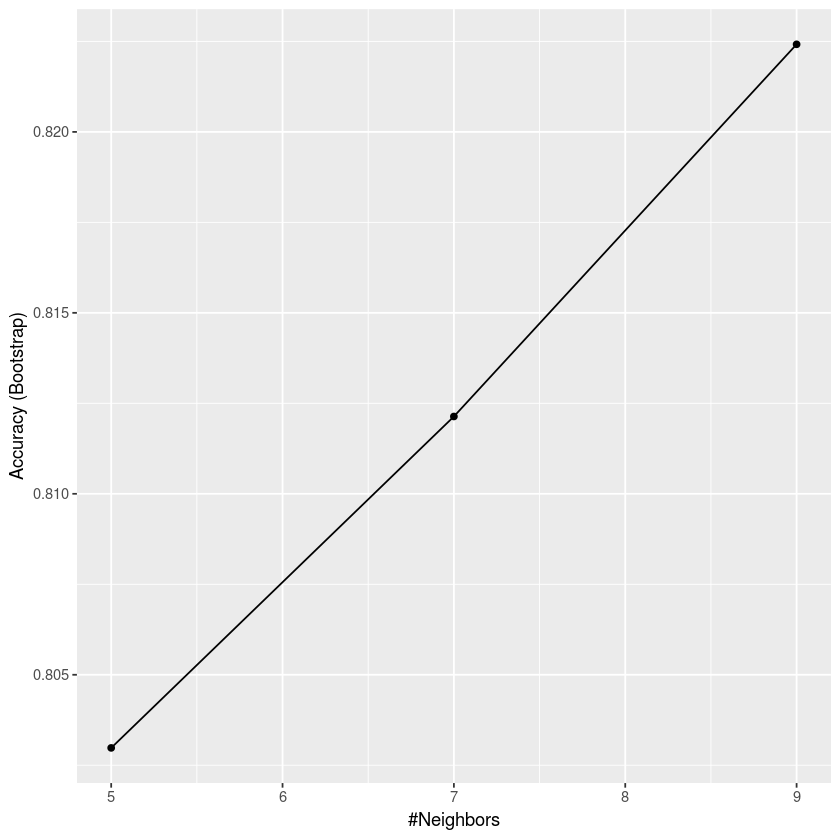

In [21]:
ggplot(train_knn,highlight=TRUE)

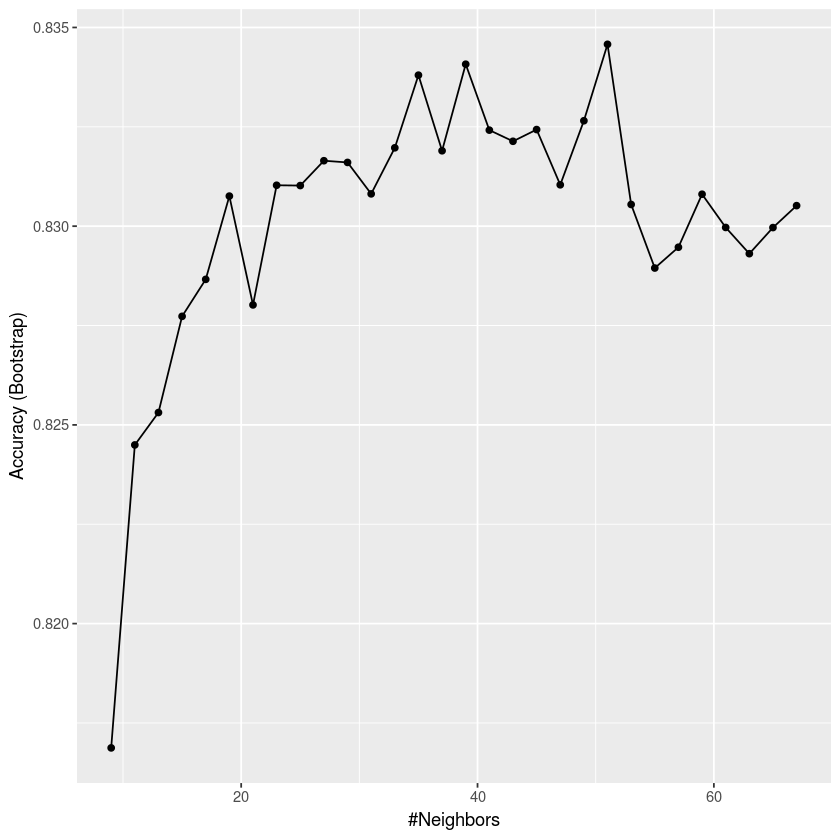

In [22]:
train_knn <- train(y~.,method='knn',data=mnist_27$train,tuneGrid=data.frame(k=seq(9,67,2)))
ggplot(train_knn, highlight=TRUE)

In [23]:
train_knn$bestTune

,k
22,51


In [24]:
train_knn$finalModel

51-nearest neighbor model
Training set outcome distribution:

  2   7 
379 421 


In [25]:
confusionMatrix(predict(train_knn,mnist_27$test,type='raw'),mnist_27$test$y)$overall['Accuracy']

Accuracy 
    0.85

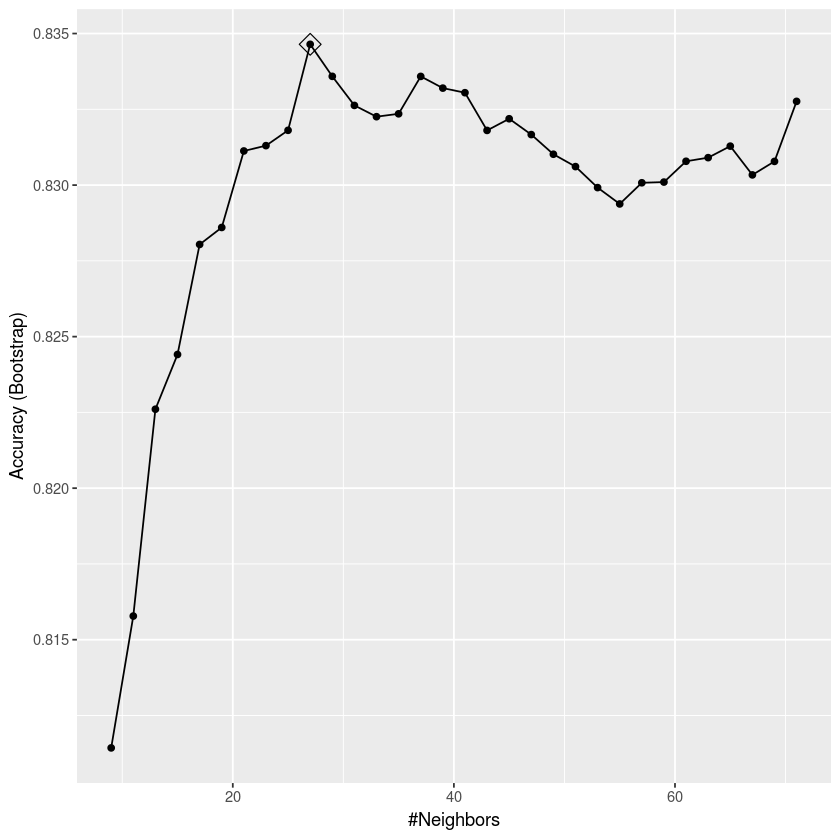

In [28]:
control <- trainControl(method = 'cv', number=10,p=0.9)
train_knn_cv <- train(y ~., method='knn',data=mnist_27$train, tuneGrid=data.frame(k=seq(9,71,2)))
ggplot(train_knn_cv, highlight=TRUE)

In [30]:
library(gam)

Loading required package: splines
Loading required package: foreach
Loaded gam 1.16



In [31]:
modelLookup('gamLoess')

model,parameter,label,forReg,forClass,probModel
gamLoess,span,Span,TRUE,TRUE,TRUE
gamLoess,degree,Degree,TRUE,TRUE,TRUE


In [32]:
grid <- expand.grid(span = seq(0.15,0.65,len=10),degree=1)

In [34]:
train_loess <- train(y ~.,method='gamLoess',tuneGrid=grid,data=mnist_27$train)

Warning message in gam.lo(data[["lo(x_1, span = 0.15, degree = 1)"]], z, w, span = 0.15, :
“eval  0.46667”Warning message in gam.lo(data[["lo(x_1, span = 0.15, degree = 1)"]], z, w, span = 0.15, :
“upperlimit  0.43969”Warning message in gam.lo(data[["lo(x_1, span = 0.15, degree = 1)"]], z, w, span = 0.15, :
“extrapolation not allowed with blending”Warning message in gam.lo(data[["lo(x_2, span = 0.15, degree = 1)"]], z, w, span = 0.15, :
“eval  0.089286”Warning message in gam.lo(data[["lo(x_2, span = 0.15, degree = 1)"]], z, w, span = 0.15, :
“lowerlimit  0.092518”Warning message in gam.lo(data[["lo(x_2, span = 0.15, degree = 1)"]], z, w, span = 0.15, :
“extrapolation not allowed with blending”Warning message in gam.lo(data[["lo(x_2, span = 0.15, degree = 1)"]], z, w, span = 0.15, :
“eval  0.57895”Warning message in gam.lo(data[["lo(x_2, span = 0.15, degree = 1)"]], z, w, span = 0.15, :
“upperlimit  0.54068”Warning message in gam.lo(data[["lo(x_2, span = 0.15, degree = 1)"]], z, w, span

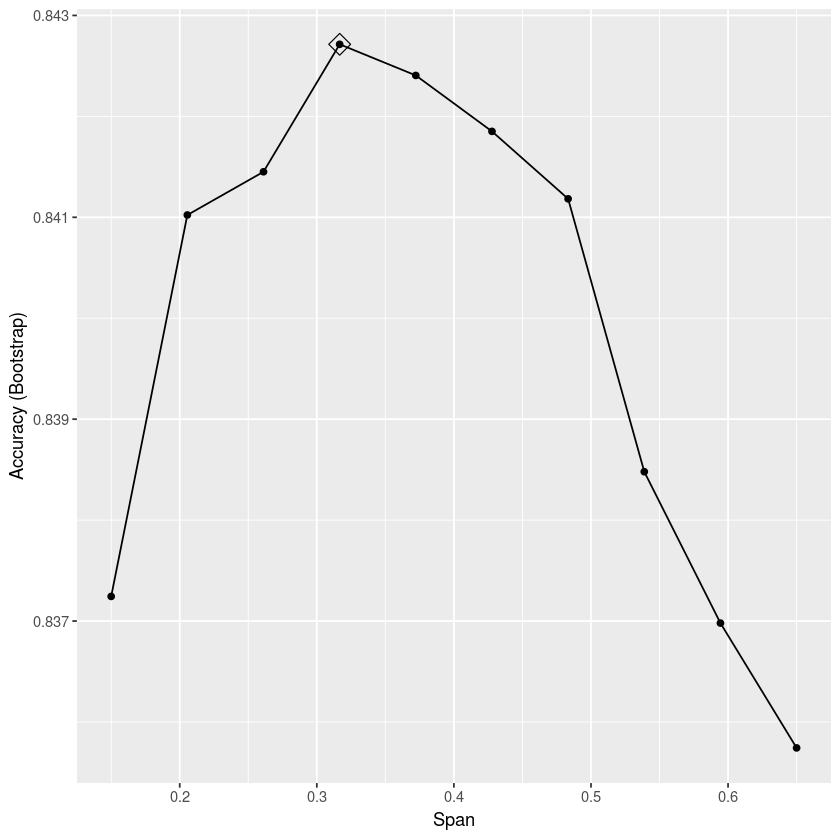

In [35]:
ggplot(train_loess, highlight=TRUE)

In [36]:
confusionMatrix(predict(train_loess,mnist_27$test,type='raw'),mnist_27$test$y)$overall['Accuracy']

Accuracy 
    0.85